# Examples of scanpy visualizations

This notebook gives an example of some of the visualization methods available in scanpy.

In [1]:
import scanpy.api as sc
import pandas as pd
from matplotlib import rcParams
sc.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.3.3+65.g850595e anndata==0.6.13 numpy==1.15.4 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.20.0 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


Data was obtained from 10x PBMC 68k dataset (https://support.10xgenomics.com/single-cell-gene-expression/datasets). The dataset was filtered and a sample of 700 cells and 765 highly variable genes was kept.

For this data, PCA and UMAP are already computed. Also, louvain clustering cell cycle detection are present in `pbmc.obs`

In [2]:
pbmc = sc.datasets.pbmc68k_reduced()

In [33]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'dendrogram'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

To modify the default figure size use rcParams

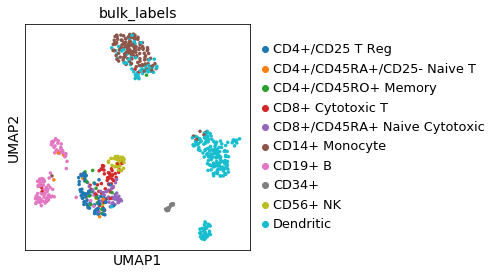

In [4]:
rcParams['figure.figsize'] = 4,4
sc.pl.umap(pbmc, color=['bulk_labels'], s=50)

### define list of marker genes from literature

In [5]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ',  'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',  
                'FCGR3A', 'FCER1A', 'CST3']

### plot marker genes per cluster using stacked violin plots

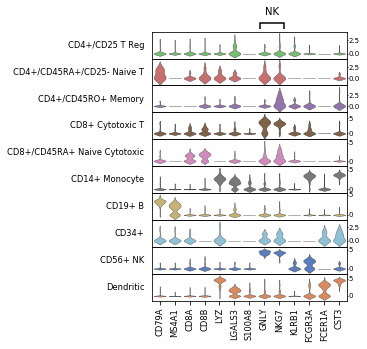

In [6]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels',
                         var_group_positions=[(7, 8)], var_group_labels=['NK'])

#### same as before but swapping the axes and with dendrogram (notice that the categories are reordered)

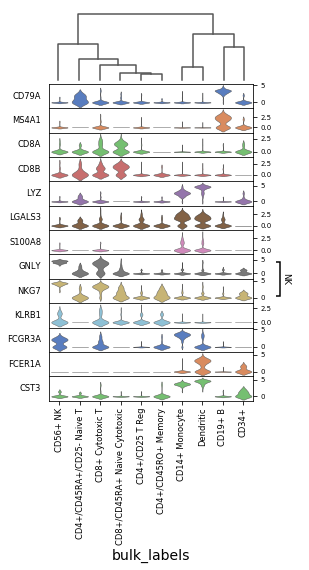

In [7]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels', swap_axes=True, 
                         var_group_positions=[(7, 8)], var_group_labels=['NK'], dendrogram=True)

#### visualize gene expression using dotplot

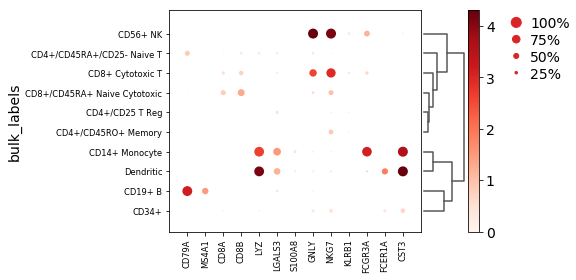

In [8]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True)

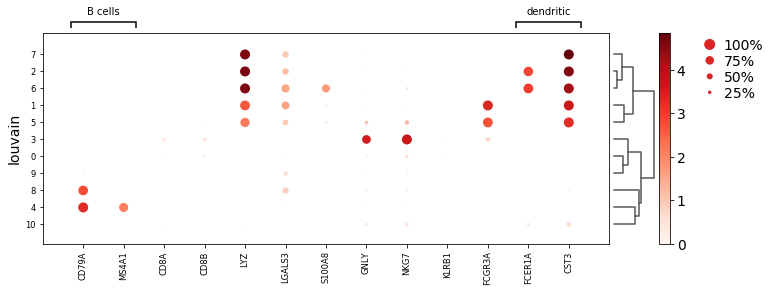

In [9]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='louvain', 
              var_group_positions=[(0,1), (11, 12)], 
              var_group_labels=['B cells', 'dendritic'], 
              figsize=(12,4), var_group_rotation=0, dendrogram=True)

#### visualize gene expression using matrixplot

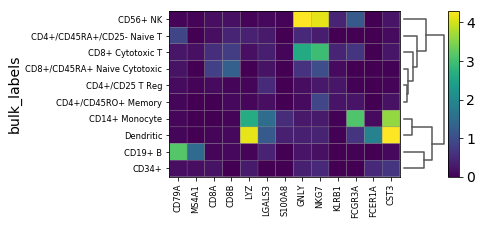

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[4.16, 0.8, 0.2])

In [10]:
sc.pl.matrixplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True)

In [11]:
marker_genes_2 = [x for x in marker_genes if x in pbmc.var_names]

Same as before, but using scaled gene values

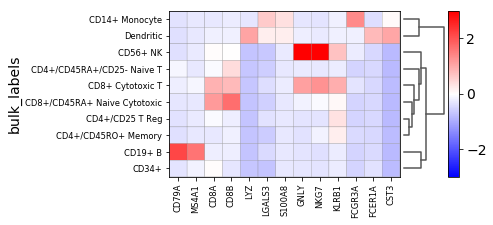

In [12]:
ax = sc.pl.matrixplot(pbmc, marker_genes_2, groupby='bulk_labels', dendrogram=True, use_raw=False, vmin=-3, vmax=3, cmap='bwr')

#### visualize gene expression using heatmap

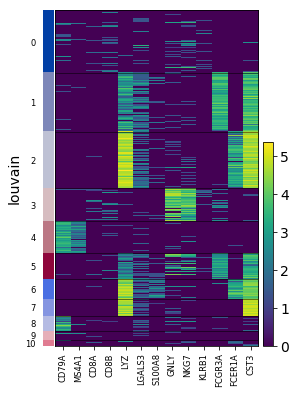

In [13]:
ax = sc.pl.heatmap(pbmc,marker_genes, groupby='louvain')

same as before but using `use_raw=False` which uses a divergent colormap. Some genes are highlighted and the
figure size is adjusted

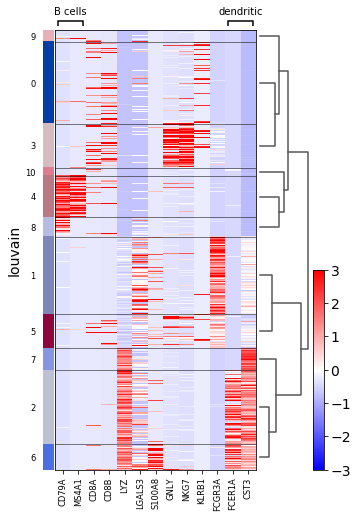

In [14]:
ax = sc.pl.heatmap(pbmc, marker_genes, groupby='louvain', figsize=(5, 8), 
              var_group_positions=[(0,1), (11, 12)], use_raw=False,
              var_group_labels=['B cells', 'dendritic'], var_group_rotation=0, dendrogram=True)

#### visualize gene expression using tracksplot

In [15]:
# Track plot data is better visualized using the non-log counts
import numpy as np
ad = pbmc.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

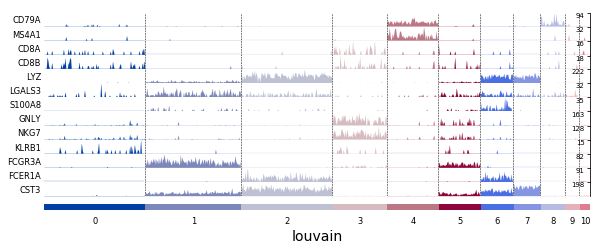

In [16]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='louvain')

## visualization of gene markers

Gene markers are computed using the *bulk_labels* categories and the *logreg* method

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(pbmc, groupby='bulk_labels', method='logreg')

#### visualize using panels

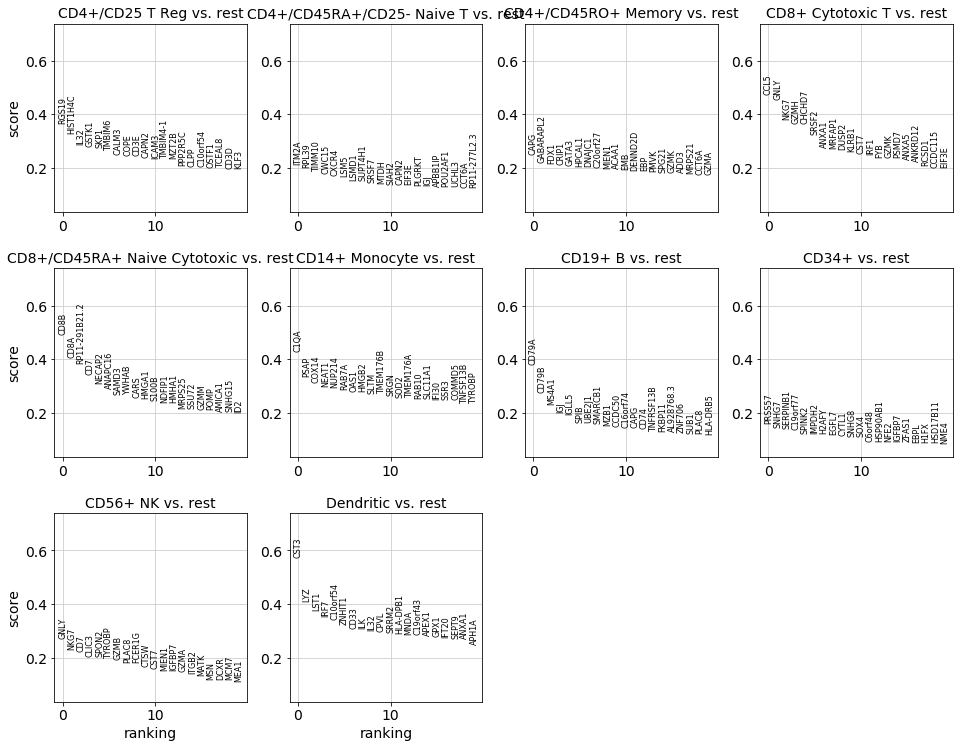

In [18]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(pbmc)

#### visualize using dotplot 

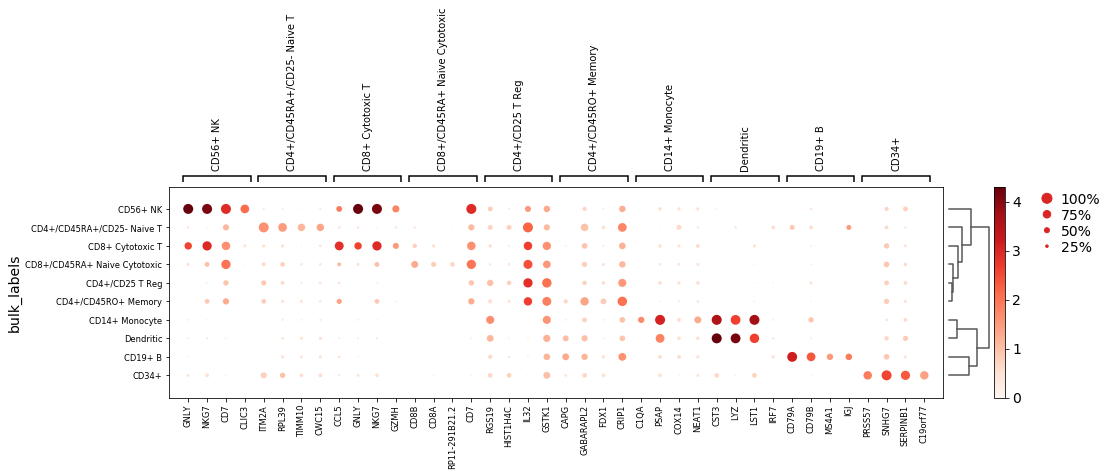

In [19]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

##### Dotplot focusing only on two groups (the groups option is also available for violin, heatmap and matrix plots)

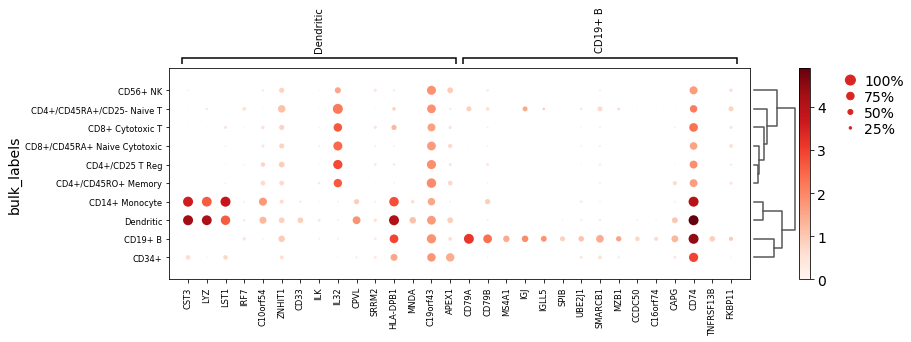

In [20]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=15, groups=['Dendritic', 'CD19+ B'])

##### Dotplot showing the marker genes but with respect to 'louvain' clusters (same option is also available for violin, heatmap and matrix plots)

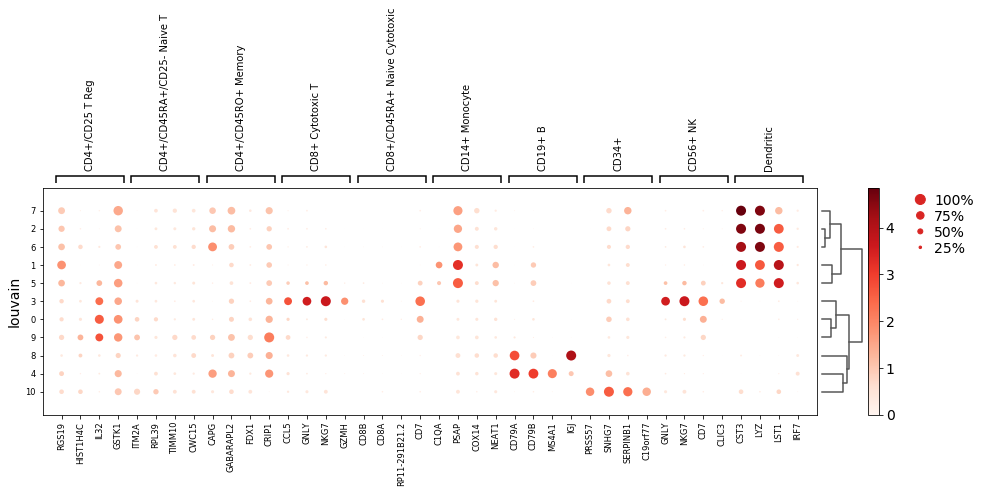

In [21]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, groupby='louvain', n_genes=4, dendrogram=True)

#### visualize using matrixplot 

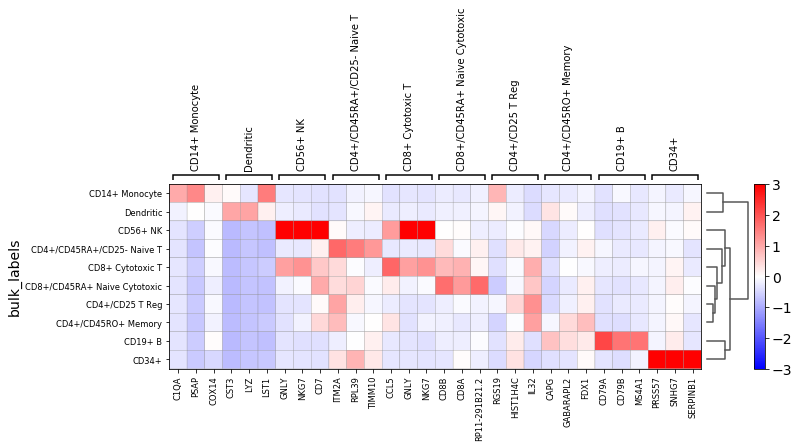

In [22]:
axs = sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False)

saving figure to file ./figures/matrixplot_matrixplot.png


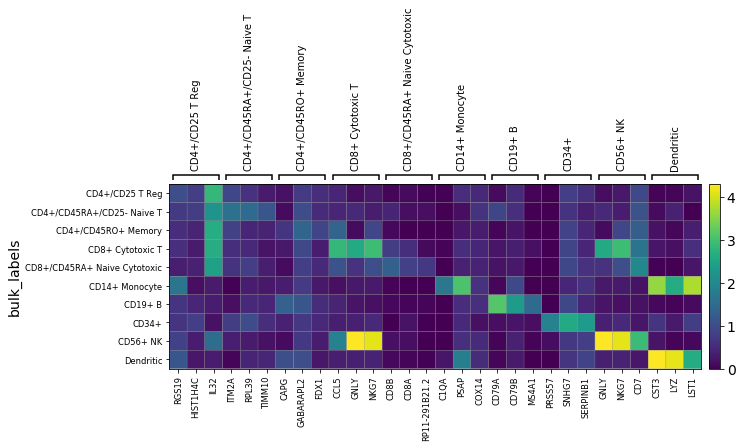

In [23]:
axs = sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, dendrogram=False)

#### visualize using stacked violing plots

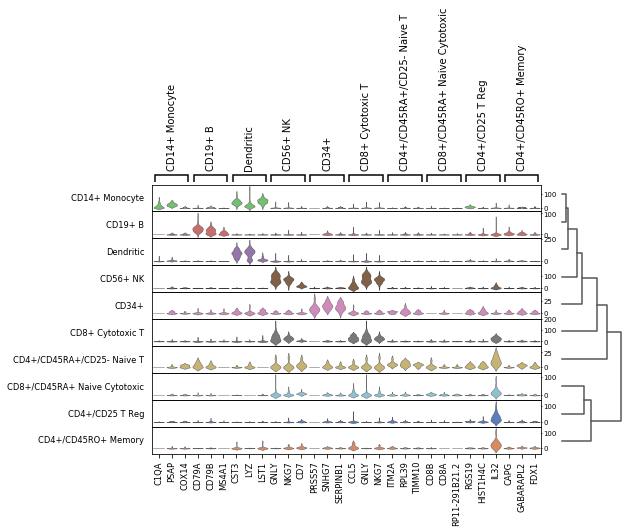

In [24]:
# instead of pbmc we use the 'ad' object (created earlier) in which the raw matrix is exp(pbmc.raw.matrix). This
# highlights the differences between the markers.
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3)

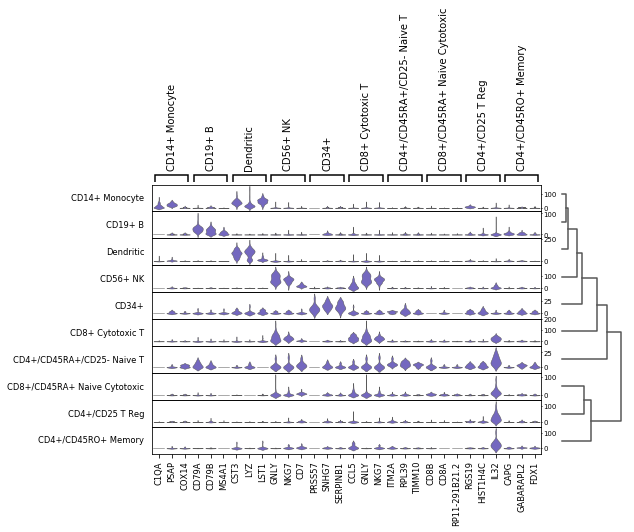

In [25]:
# setting row_palette='slateblue' makes all violin plots of the same color
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3, row_palette='slateblue')

##### Same as previous but with axes swapped

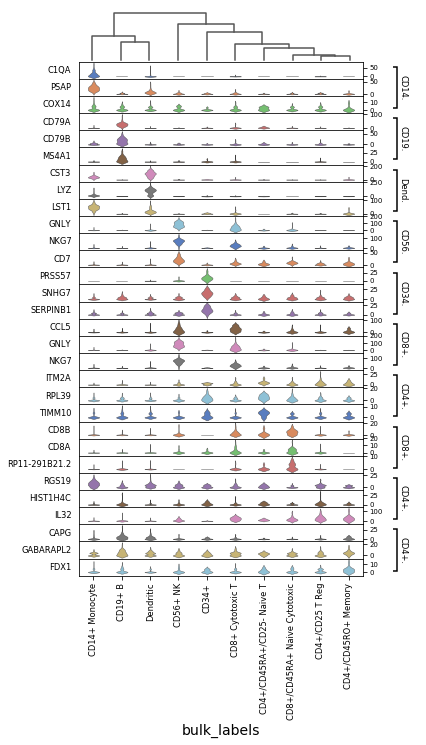

In [26]:
# width is used to set the violin plot width. Here, after setting figsize wider than default,
# the `width` arguments helps to keep the violin plots thin.
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3, swap_axes=True, figsize=(6, 10), width=0.4)

#### visualize using heatmap

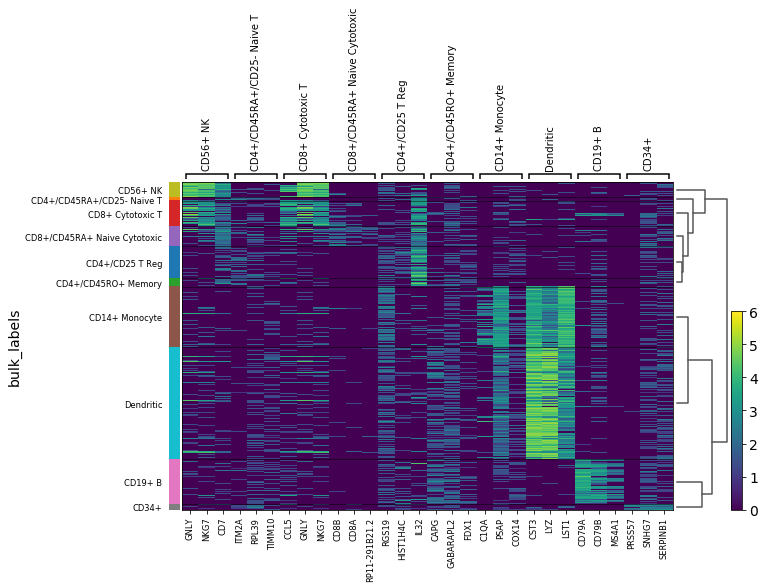

In [27]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, vmax=6)

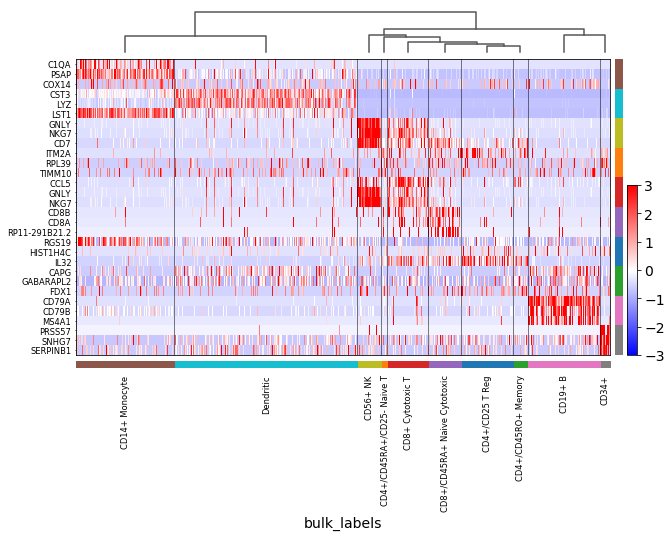

In [28]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True)

Showing 10 genes per category, turning the gene labels off and swapping the axes. Notice that when the image is swaped, a color code for the categories appear instead of the 'brackets'.

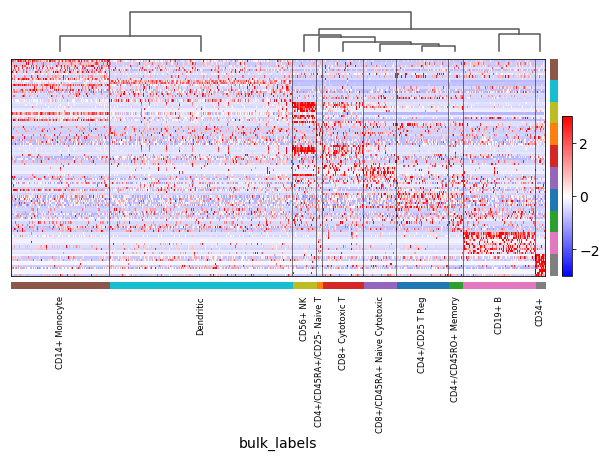

In [29]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False)

#### visualize using tracksplot

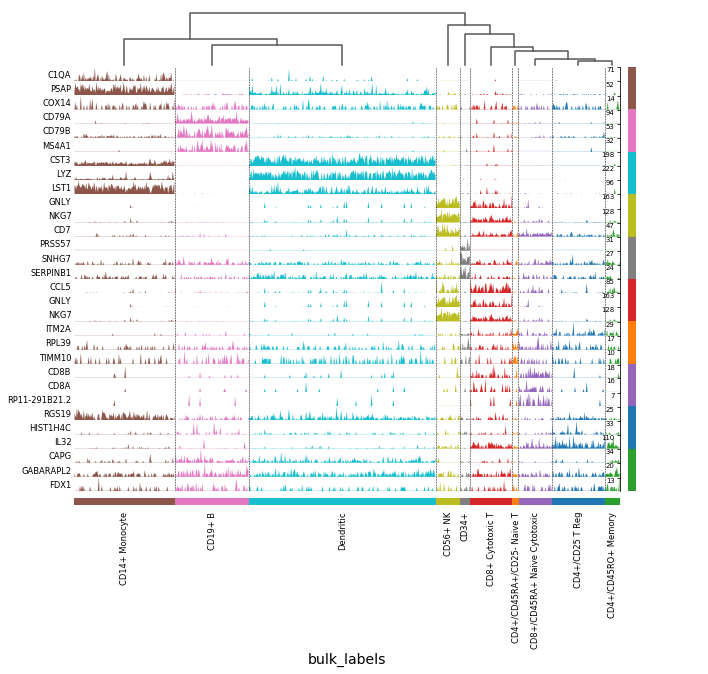

In [30]:
sc.pl.rank_genes_groups_tracksplot(ad, n_genes=3)

#### compare CD4+/CD25 T Reg markers vs. rest using violin

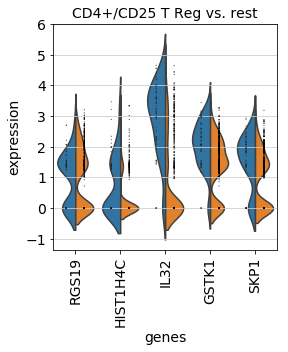

In [31]:
sc.pl.rank_genes_groups_violin(pbmc, groups=pbmc.obs.bulk_labels.cat.categories[0], n_genes=5, jitter=False)